<a href="https://colab.research.google.com/github/LeoVogiatzis/medical_data_analysis/blob/main/class_imbalance_(v0_1_thyroid).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
 
dt = pd.read_csv("/content/drive/MyDrive/Thyroid_Sick.csv")
dt.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [ ]:
dt.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [ ]:
dt['Class'].value_counts()

negative    3541
sick         231
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


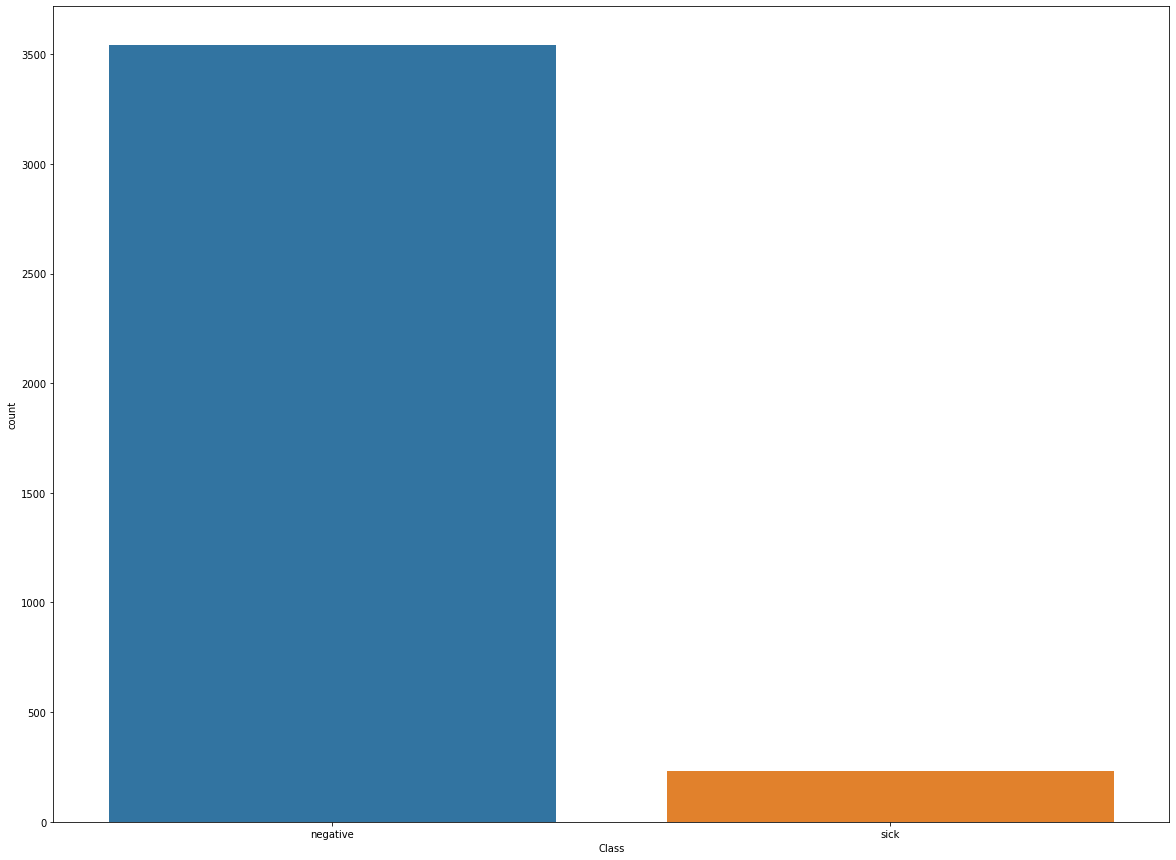

In [ ]:
sns.countplot(dt['Class'])

In [ ]:
print(dt.isnull().sum())

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
Class         

In [ ]:
dt.drop(["TBG", "referral source"], axis=1, inplace=True)
dt = dt.loc[:, ~dt.columns.str.endswith("measured")]
dt.dropna(subset=['sex'], inplace=True)

dt = dt.replace(["f", "t"], [0, 1])
dt = dt.replace(["F", "M"], [0, 1])
dt = dt.replace(["Negative", "Sick"], [0, 1])

print(dt.shape)

(3622, 22)


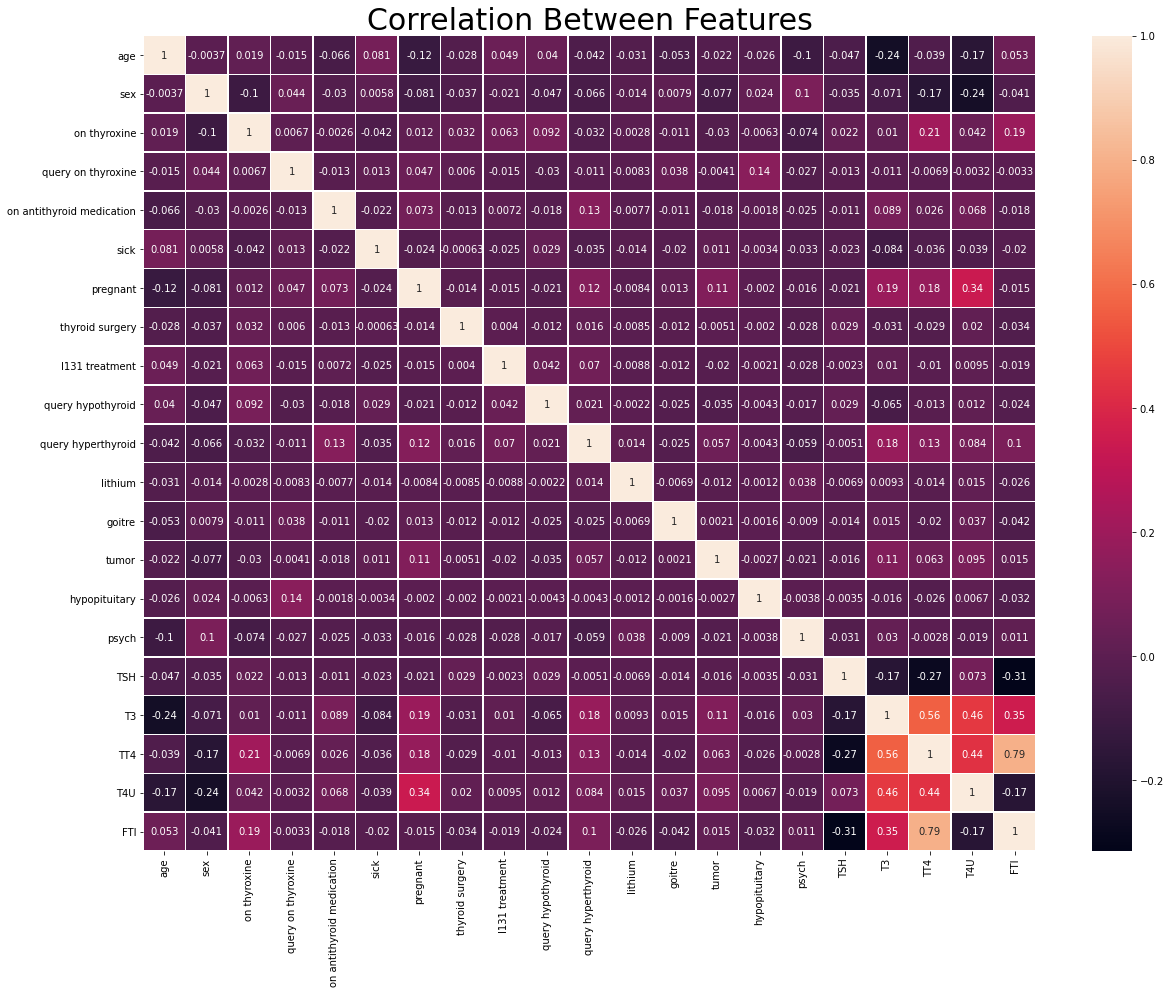

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(dt.corr(), annot = True, linewidths=.5)
plt.title('Correlation Between Features', fontsize = 30)
plt.show()

In [ ]:
X = dt.drop(columns=['Class'])
y = dt['Class']

X.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0
1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,NaN,NaN
2,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109.0,0.91,120.0
3,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,NaN,NaN
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0


In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=10, random_state=42)

mdl = clf.fit(x_train, y_train)
y_pred = mdl.predict(x_test)

target_names = ['negative', 'sick']
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

    negative     0.9619    0.9921    0.9768      1018
        sick     0.7838    0.4203    0.5472        69

    accuracy                         0.9558      1087
   macro avg     0.8728    0.7062    0.7620      1087
weighted avg     0.9506    0.9558    0.9495      1087



In [ ]:
smote = SMOTE(random_state=115, k_neighbors=10)

x_s_train, y_s_train = smote.fit_resample(x_train, y_train)
x_s_test, y_s_test = smote.fit_resample(x_test, y_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=10, random_state=42)

mdl = clf.fit(x_s_train, y_s_train)
y_s_pred = mdl.predict(x_s_test)

target_names = ['negative', 'sick']
print(classification_report(y_s_test, y_s_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

    negative     0.8329    0.9597    0.8918      1018
        sick     0.9525    0.8075    0.8740      1018

    accuracy                         0.8836      2036
   macro avg     0.8927    0.8836    0.8829      2036
weighted avg     0.8927    0.8836    0.8829      2036



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
smote = BorderlineSMOTE(random_state=115, k_neighbors=10)

x_s_train, y_s_train = smote.fit_resample(x_train, y_train)
x_s_test, y_s_test = smote.fit_resample(x_test, y_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=10, random_state=42)

mdl = clf.fit(x_s_train, y_s_train)
y_s_pred = mdl.predict(x_s_test)

target_names = ['negative', 'sick']
print(classification_report(y_s_test, y_s_pred, target_names=target_names, digits=4))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

    negative     0.8374    0.9666    0.8974      1018
        sick     0.9605    0.8124    0.8803      1018

    accuracy                         0.8895      2036
   macro avg     0.8990    0.8895    0.8888      2036
weighted avg     0.8990    0.8895    0.8888      2036



In [ ]:
smote = SMOTE(random_state=115, k_neighbors=10)
tomek = TomekLinks(random_state=232)

x_s_train, y_s_train = smote.fit_resample(x_train, y_train)
x_s_test, y_s_test = smote.fit_resample(x_test, y_test)

x_s_train, y_s_train = tomek.fit_sample(x_s_train, y_s_train)
x_s_test, y_s_test = tomek.fit_sample(x_s_test, y_s_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=10, random_state=42)

mdl = clf.fit(x_s_train, y_s_train)
y_s_pred = mdl.predict(x_s_test)

target_names = ['negative', 'sick']
print(classification_report(y_s_test, y_s_pred, target_names=target_names, digits=4))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

    negative     0.8462    0.9568    0.8981      1018
        sick     0.9497    0.8244    0.8826      1008

    accuracy                         0.8909      2026
   macro avg     0.8980    0.8906    0.8904      2026
weighted avg     0.8977    0.8909    0.8904      2026



In [ ]:
from numpy import mean

eec = EasyEnsembleClassifier(n_estimators=10, random_state=115)

imputer = KNNImputer(n_neighbors=5, weights="uniform")
x_fix = imputer.fit_transform(X)

scaler = StandardScaler()
x_fix = scaler.fit_transform(x_fix)

pca = PCA(n_components=10)
x_fix = pca.fit_transform(x_fix)

model = EasyEnsembleClassifier(n_estimators=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=115)
scores = cross_val_score(model, x_fix, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.933
